# Importing Datas and Librairies

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install tweet-preprocessor

In [45]:
import csv
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.HASHTAG, p.OPT.SMILEY, p.OPT.NUMBER)
from collections import Counter
from nltk import ngrams
from nltk.tokenize import WordPunctTokenizer

In [20]:
df_the_song_of_achilles_original = pd.read_csv('/content/gdrive/MyDrive/Datasets/twitter_book_data/the_song_of_achilles_ok.csv')
df = df_the_song_of_achilles_original
print(df.shape)

(1000, 2)


## processing the cleaning of all tweets like pseudo, url, emoji...

In [ ]:
for i in range(df['tweets'].shape[0]):
  df['tweets'][i] = p.clean(df['tweets'][i])
  df['tweets'][i] = re.sub(r'@[A-Za-z0-9]+','',df['tweets'][i])  
  df['tweets'][i] = df['tweets'][i].replace("_", " ")
  df['tweets'][i] = df['tweets'][i].replace("-", " ")
  df['tweets'][i] = df['tweets'][i].replace("!", "")
  df['tweets'][i] = df['tweets'][i].replace('|', " ")
  df['tweets'][i] = df['tweets'][i].replace('(', " ")
  df['tweets'][i] = df['tweets'][i].replace(')', " ")
  df['tweets'][i] = df['tweets'][i].lower()
  df['tweets'][i] = df['tweets'][i].replace('/', " ")
  df['tweets'][i] = df['tweets'][i].replace('.', " ")
  df['tweets'][i] = df['tweets'][i].replace('?', " ")
  df['tweets'][i] = df['tweets'][i].replace('"', " ")
  df['tweets'][i] = df['tweets'][i].replace('*', " ")

In [ ]:
df

# Making big string and list of word

In [26]:
all_words = ''
for i in range(df['tweets'].shape[0]):
  all_words = all_words + df['tweets'][i]

In [27]:
list_words = all_words.split(' ')

# Removing the Stop Words and some common and useless words for sentiment analysis

In [ ]:
# showing bigger occurencies
word_counts = Counter(list_words)
for w in word_counts.most_common(9):
    print(f"{w[0]}:  \t{w[1]} ")

In [51]:
# Cleaning
list_words_without_stopword = [ word for word in list_words if word not in list(WordCloud().stopwords) ]
my_stopwords = ['achilles', 'read', 'song', 'im','madeline','book','achilles,','reading','miller','book']
list_words__without_stopword_final = [ word for word in list_words_without_stopword if word not in my_stopwords ]                                                      

In [ ]:
# Verification
word_counts = Counter(list_words__without_stopword_final)
for w in word_counts.most_common(9):
    print(f"{w[0]}:  \t{w[1]} ")


In [52]:
all_words = " ".join([tweets for tweets in list_words__without_stopword_final])

# Wordcloud

In [53]:
wordcloud = WordCloud(
    background_color = 'white', width=300, height=200, random_state= 55, max_font_size=300 , max_words= 100
    ).generate(all_words)

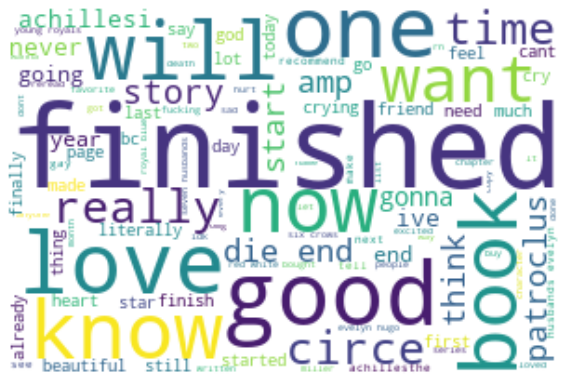

In [57]:
plt.figure(figsize = (10, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# bigrammes

In [46]:
# Tokenize
tokens = WordPunctTokenizer().tokenize(all_words)
bigrams = [w for w in  ngrams(tokens,n=2)]
print(bigrams)

[('lake', 'tears'), ('tears', 'cause'), ('cause', 'finished'), ('finished', 'midnight'), ('midnight', 'library'), ('library', 'matt'), ('matt', 'haig'), ('haig', 'red'), ('red', ','), (',', 'white'), ('white', '&'), ('&', 'amp'), ('amp', ';'), (';', 'royal'), ('royal', 'blue'), ('blue', 'casey'), ('casey', 'almond'), ('almond', 'won'), ('won', 'pyung'), ('pyung', 'sohn'), ('sohn', 'die'), ('die', 'end'), ('end', 'adam'), ('adam', 'silvera'), ('silvera', 'serial'), ('serial', 'bumi'), ('bumi', 'tere'), ('tere', 'liye'), ('liye', 'dll'), ('dll', 'hits'), ('hits', 'hardokay'), ('hardokay', 'hold'), ('hold', 'sick'), ('sick', 'today'), ('today', 'will'), ('will', 'kite'), ('kite', 'runneryeay'), ('runneryeay', 'finished'), ('finished', 'achillesi'), ('achillesi', 'cant'), ('cant', 'stop'), ('stop', 'reliving'), ('reliving', 'wilhelm'), ('wilhelm', 'simon'), ('simon', 'aaaaaaaaaa'), ('aaaaaaaaaa', 'haha'), ('haha', 'agreed'), ('agreed', 'hades'), ('hades', "'"), ("'", 'character'), ('charac

# trigrammes

In [47]:
trigrams = ['_'.join(w) for w in  ngrams(tokens,n=3)]
print(trigrams)

['lake_tears_cause', 'tears_cause_finished', 'cause_finished_midnight', 'finished_midnight_library', 'midnight_library_matt', 'library_matt_haig', 'matt_haig_red', 'haig_red_,', 'red_,_white', ',_white_&', 'white_&_amp', '&_amp_;', 'amp_;_royal', ';_royal_blue', 'royal_blue_casey', 'blue_casey_almond', 'casey_almond_won', 'almond_won_pyung', 'won_pyung_sohn', 'pyung_sohn_die', 'sohn_die_end', 'die_end_adam', 'end_adam_silvera', 'adam_silvera_serial', 'silvera_serial_bumi', 'serial_bumi_tere', 'bumi_tere_liye', 'tere_liye_dll', 'liye_dll_hits', 'dll_hits_hardokay', 'hits_hardokay_hold', 'hardokay_hold_sick', 'hold_sick_today', 'sick_today_will', 'today_will_kite', 'will_kite_runneryeay', 'kite_runneryeay_finished', 'runneryeay_finished_achillesi', 'finished_achillesi_cant', 'achillesi_cant_stop', 'cant_stop_reliving', 'stop_reliving_wilhelm', 'reliving_wilhelm_simon', 'wilhelm_simon_aaaaaaaaaa', 'simon_aaaaaaaaaa_haha', 'aaaaaaaaaa_haha_agreed', 'haha_agreed_hades', "agreed_hades_'", "h